# Análisis de sentimientos respecto a tweets sobre vacunción COVID19

ERROR: Could not find a version that satisfies the requirement matplotlibimport (from versions: none)
ERROR: No matching distribution found for matplotlibimport


Se han truncado las últimas 5000 líneas del flujo de salida.

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-50-c8e56ea9b1fd>:45: ParserWarning: Skipping line 88729: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-50-c8e56ea9b1fd>:45: ParserWarning: Skipping line 88731: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-50-c8e56ea9b1fd>:45: ParserWarning: Skipping line 88732: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-50-c8e56ea9b1fd>:45: ParserWarning: Skipping line 88733: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas

Estadísticas de sentimiento:
count    38162.000000
mean         0.176589
std          1.817814
min        -17.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         14.000000
Name: sentimiento, dtype: float64
            date     username  \
0  2021/4/8 0:59  msnashville   
1  2021/4/8 0:59   benreidy_3   
2  2021/4/8 0:58   mcburtonmd   
3  2021/4/8 0:58   arkbizchat   
4  2021/4/8 0:58      dmrider   

                                               tweet   Emotion mentions  \
0  Experts Explain What Happens If You Skip Your ...   Netural       []   
1  I¡¯d rather contract COVID-19 than get the vac...   Netural       []   
2  Hospitalist perspectives on barriers to recomm...  Positive       []   
3  ¡°We Are Hoarding¡±: Why the U.S. Still Can¡¯t...   Netural       []   
4  New from me: COVID-19 vaccine to be offered to...   Netural       []   

   replies_count  retweets_count  likes_count  \
0              0               0            0   
1            

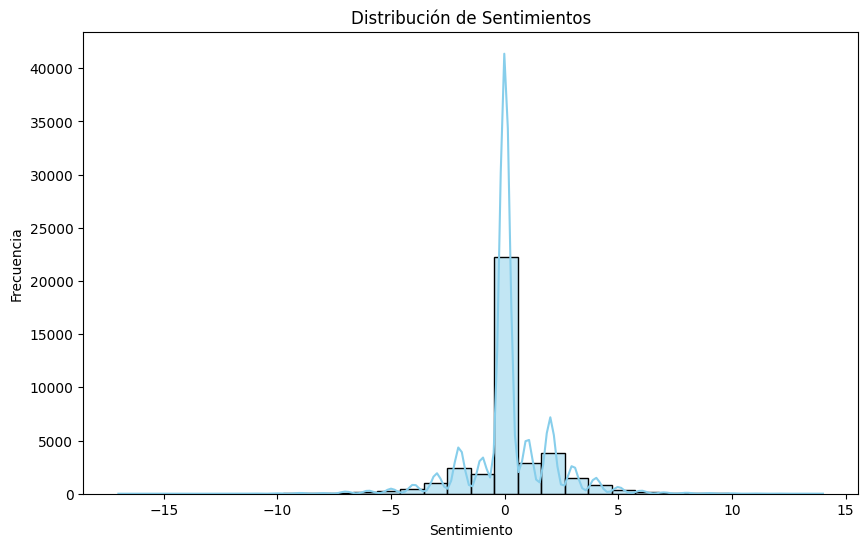

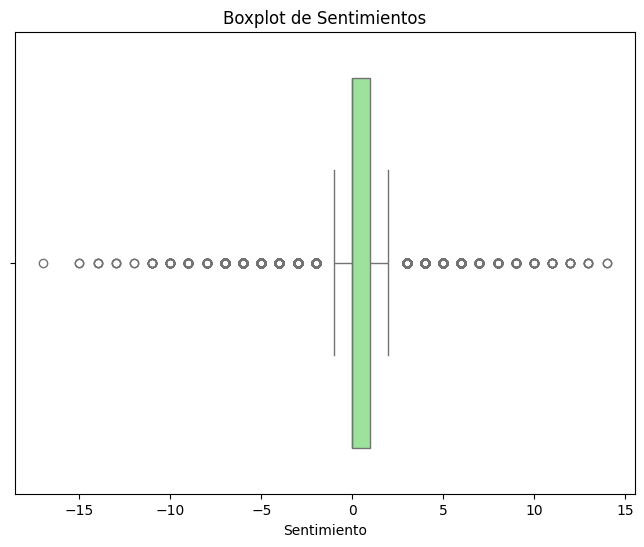

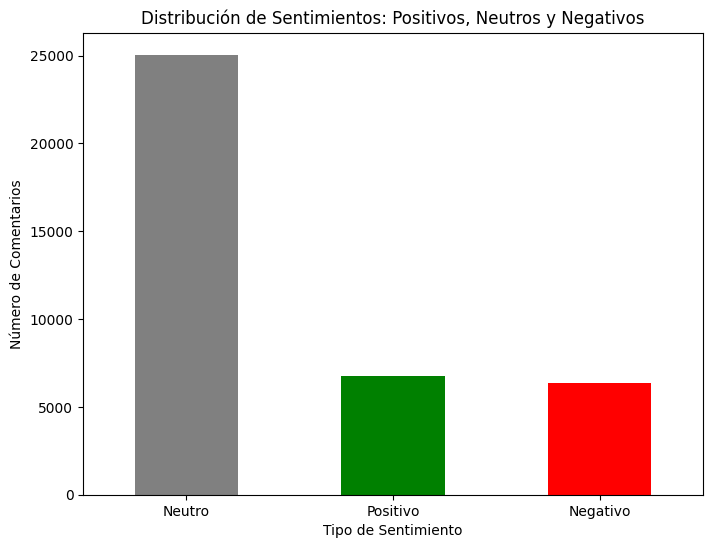

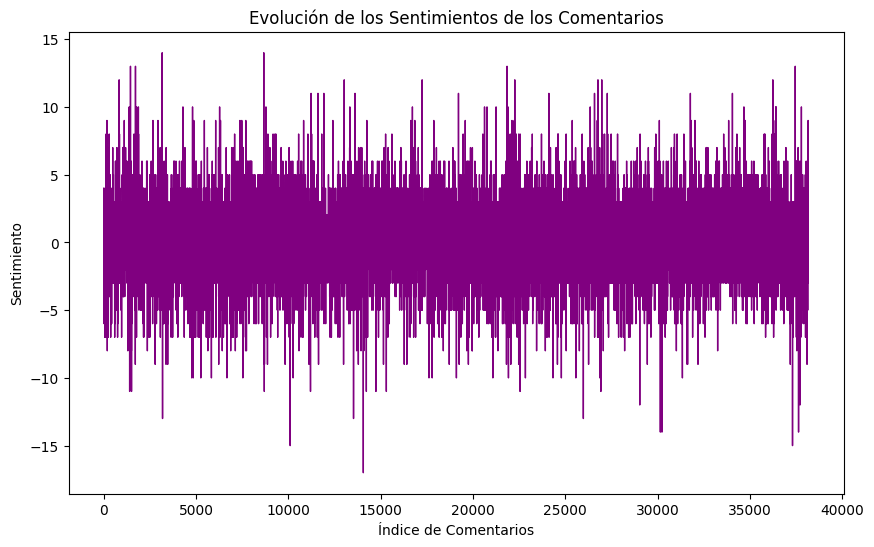

In [ ]:

# Instalamos las librerías necesarias para la codificación

!pip install pandas matplotlibimport pandas as pd
import re
from collections import Counter
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pandas as pd


# Cargar el diccionario de términos con polaridad
def cargar_diccionario_sentimientos(archivo_txt):
    diccionario_sentimientos = {}
    with open('/content/drive/MyDrive/AFINN-96.txt', 'r', encoding='utf-8') as f:
        for linea in f:
            partes = linea.strip().split()
            if len(partes) == 2:
                try:
                    palabra, valor = partes[0], float(partes[1])
                    diccionario_sentimientos[palabra.lower()] = valor
                except ValueError:
                    print(f"Skipping line: {linea.strip()} - Invalid sentiment score format.") # Print message and skip line

    return diccionario_sentimientos

# Función para limpiar texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'http\S+|www\S+', '', texto)
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    return texto

# Función para analizar sentimiento
def analizar_sentimiento(texto, diccionario):
    palabras = limpiar_texto(texto).split()
    valores = [diccionario.get(palabra, 0) for palabra in palabras]
    return sum(valores)

# Cargar los datos
try:
    df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='utf-8', on_bad_lines= 'warn', engine= 'python')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
    except UnicodeDecodeError:
        df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='iso-8859-1', on_bad_lines= 'warn', engine= 'python')

# Cargar el diccionario de términos
diccionario_sentimientos = cargar_diccionario_sentimientos('/content/drive/MyDrive/AFINN-96.txt')

# Verificar que el dataset tiene una columna con texto
columna_texto = 'tweet'
if columna_texto not in df.columns:
    raise ValueError(f'No se encontró la columna "{columna_texto}" en el CSV.')

# Aplicar análisis de sentimiento
df['sentimiento'] = df[columna_texto].astype(str).apply(lambda x: analizar_sentimiento(x, diccionario_sentimientos))

# Mostrar estadísticas
print("Estadísticas de sentimiento:")
print(df['sentimiento'].describe())

# Mostrar ejemplos
df[['tweet', 'sentimiento']].head(10)

# Mostrar las primeras filas de datos
print(df.head())

# Medidas estadísticas
media_sentimiento = df['sentimiento'].mean()
mediana_sentimiento = df['sentimiento'].median()
max_sentimiento = df['sentimiento'].max()
min_sentimiento = df['sentimiento'].min()
desviacion_estandar_sentimiento = df['sentimiento'].std()
suma_sentimiento = df['sentimiento'].sum()

# Mostrar las estadísticas calculadas
print("\nMedidas estadísticas sobre los sentimientos:")
print(f"Media: {media_sentimiento}")
print(f"Mediana: {mediana_sentimiento}")
print(f"Máximo: {max_sentimiento}")
print(f"Mínimo: {min_sentimiento}")
print(f"Desviación estándar: {desviacion_estandar_sentimiento}")
print(f"Suma total de sentimientos: {suma_sentimiento}")


# Análisis de los sentimientos positivos, negativos y neutros
# Definir los umbrales para sentimientos positivos, negativos y neutros
umbral_positivo = 1
umbral_negativo = -1

# Clasificar los sentimientos
df['tipo_sentimiento'] = pd.cut(df['sentimiento'], bins=[-np.inf, umbral_negativo, umbral_positivo, np.inf], labels=['Negativo', 'Neutro', 'Positivo'])

# Contar los sentimientos
conteo_sentimientos = df['tipo_sentimiento'].value_counts()
# Mostrar el conteo de sentimientos
print("\nConteo de sentimientos:")
print(conteo_sentimientos)

# Mostrar la distribución de los sentimientos
print("\nDistribución de los sentimientos:")
print(df['tipo_sentimiento'].value_counts())

# Graficar los resultados

# Histograma de los sentimientos
plt.figure(figsize=(10, 6))
sns.histplot(df['sentimiento'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de los sentimientos
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['sentimiento'], color='lightgreen')
plt.title('Boxplot de Sentimientos')
plt.xlabel('Sentimiento')
plt.show()

# Gráfico de barras de los sentimientos positivos, negativos y neutros
plt.figure(figsize=(8, 6))
df['tipo_sentimiento'].value_counts().plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Distribución de Sentimientos: Positivos, Neutros y Negativos')
plt.xlabel('Tipo de Sentimiento')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=0)
plt.show()

# Gráfico de la evolución de los sentimientos a lo largo de los comentarios (si se desea)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sentimiento'], color='purple', linewidth=1)
plt.title('Evolución de los Sentimientos de los Comentarios')
plt.xlabel('Índice de Comentarios')
plt.ylabel('Sentimiento')
plt.show()

In [ ]:
# Instalar dependencias necesarias
!pip install pandas openpyxl

import pandas as pd
from collections import Counter
import re
from google.colab import files
# Cargar el archivo en un DataFrame
try:
    df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='utf-8', on_bad_lines= 'warn', engine= 'python')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
    except UnicodeDecodeError:
        df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='iso-8859-1', on_bad_lines= 'warn', engine= 'python')

# Mostrar las primeras filas del archivo para identificar la estructura
print(" Primeras filas del archivo:")
print(df.head())

#Columna objeto de análisis
columna = input("Ingresa el nombre de la columna a analizar: ")

# Verificar si la columna existe
if columna not in df.columns:
    print(f"Error: La columna '{columna}' no existe en el archivo.")
else:
    # Contar palabras en cada fila de la columna
    df["ConteoPalabras"] = df[columna].astype(str).apply(lambda x: len(x.split()))

    # Calcular el total de palabras en la columna
    total_palabras = df["ConteoPalabras"].sum()
    print(f"Total de palabras en la columna '{columna}': {total_palabras}")

    # Extraer todas las palabras y contarlas
    palabras = " ".join(df[columna].astype(str)).lower()
    palabras = re.findall(r'\b\w+\b', palabras)
    conteo_palabras = Counter(palabras)

    # Convertir a DataFrame para mejor visualización
    df_palabras = pd.DataFrame(conteo_palabras.items(), columns=["Palabra", "Frecuencia"]).sort_values(by="Frecuencia", ascending=False)

    # Mostrar las 10 palabras más repetidas
    print("Top 10 palabras más repetidas:")
    print(df_palabras.head(10))


    # Guardar los resultados en un nuevo archivo
    resultado_filename = "conteo_palabras.xlsx"
    with pd.ExcelWriter(resultado_filename) as writer:
        df.to_excel(writer, sheet_name="Conteo de Palabras", index=False)
        df_palabras.to_excel(writer, sheet_name="Frecuencia de Palabras", index=False)


Se han truncado las últimas 5000 líneas del flujo de salida.

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-47-947841a0f3cf>:13: ParserWarning: Skipping line 88729: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-47-947841a0f3cf>:13: ParserWarning: Skipping line 88731: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-47-947841a0f3cf>:13: ParserWarning: Skipping line 88732: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas_original.csv', encoding='latin-1', on_bad_lines= 'warn', engine= 'python')
<ipython-input-47-947841a0f3cf>:13: ParserWarning: Skipping line 88733: ',' expected after '"'

  df = pd.read_csv('/content/drive/MyDrive/Vacunas


🔍 Primeras filas del archivo:
            date     username  \
0  2021/4/8 0:59  msnashville   
1  2021/4/8 0:59   benreidy_3   
2  2021/4/8 0:58   mcburtonmd   
3  2021/4/8 0:58   arkbizchat   
4  2021/4/8 0:58      dmrider   

                                               tweet   Emotion mentions  \
0  Experts Explain What Happens If You Skip Your ...   Netural       []   
1  I¡¯d rather contract COVID-19 than get the vac...   Netural       []   
2  Hospitalist perspectives on barriers to recomm...  Positive       []   
3  ¡°We Are Hoarding¡±: Why the U.S. Still Can¡¯t...   Netural       []   
4  New from me: COVID-19 vaccine to be offered to...   Netural       []   

   replies_count  retweets_count  likes_count  \
0              0               0            0   
1              0               0            7   
2              0               0            0   
3              0               0            0   
4              0               8           29   

                        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Archivo generado: conteo_palabras.xlsx
